source: https://realpython.com/gradient-descent-algorithm-python/

# Basic Gradient Descent

- Approach minimum of any differentiable function (optimization)
- Might stuck in local minimum or saddle point
- Find weights and biases for gradient descent

$$v\to v-\eta \nabla C$$
- $\eta$ is the learning rate (step), a small, positive value
- Small $\eta$ may converge too slow while large $\eta$ can make the algorithm divergent

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def simple_gd(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
    """
        gradient: function with input vector and output gradient
        start: random starting point
        learn_rate: eta, controls magnitude of vector update
        n_iter: number of iterations
        tolerance: terminates the program if the difference is reached
    """
    vector = start
    vector_lst = [start]
    for _ in range(n_iter):
        vector -= learn_rate * gradient(vector)
        vector_lst.append(vector)
        if abs(learn_rate * gradient(vector)) <= tolerance:
            break
    return vector, vector_lst

## Testing Algorithm for $C=v^2$

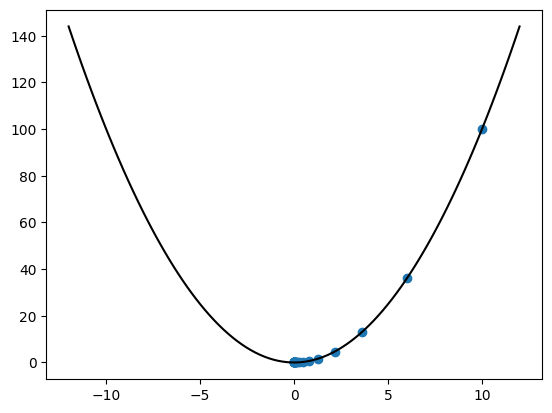

In [52]:
#gradient descent of the function
vector, vector_lst = simple_gd(gradient=lambda v:2*v, start=10, learn_rate=0.2)
vector_lst_y = [i**2 for i in vector_lst]
#plot function
x = np.linspace(-12, 12, 100)
y = [i**2 for i in x]
plt.plot(x, y, color="black")
plt.scatter(vector_lst, vector_lst_y)

## Change Learning Rate

Bigger rate: the plot overshoots

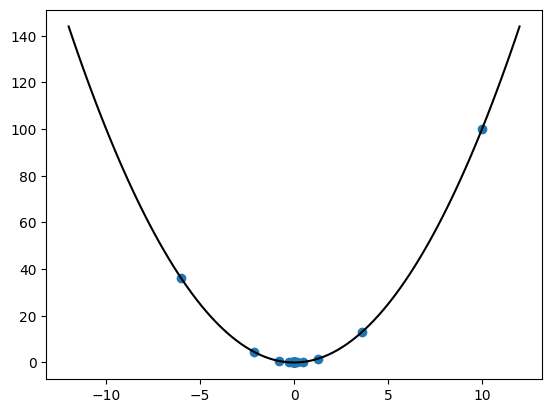

In [53]:
#gradient descent of the function
vector, vector_lst = simple_gd(gradient=lambda v:2*v, start=10, learn_rate=0.8)
vector_lst_y = [i**2 for i in vector_lst]
#plot function
x = np.linspace(-12, 12, 100)
y = [i**2 for i in x]
plt.plot(x, y, color="black")
plt.scatter(vector_lst, vector_lst_y)

Smaller rate: slow convergence

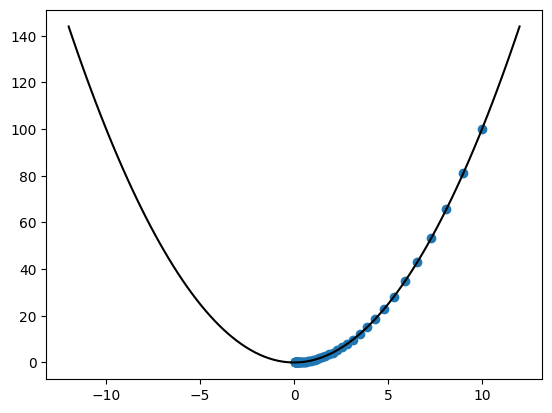

In [54]:
#gradient descent of the function
vector, vector_lst = simple_gd(gradient=lambda v:2*v, start=10, learn_rate=0.05)
vector_lst_y = [i**2 for i in vector_lst]
#plot function
x = np.linspace(-12, 12, 100)
y = [i**2 for i in x]
plt.plot(x, y, color="black")
plt.scatter(vector_lst, vector_lst_y)

## Local Minima

During the first two iterations, vector moving toward the global minimum, but it crossed to the opposite side and stayed trapped in the local minimum.

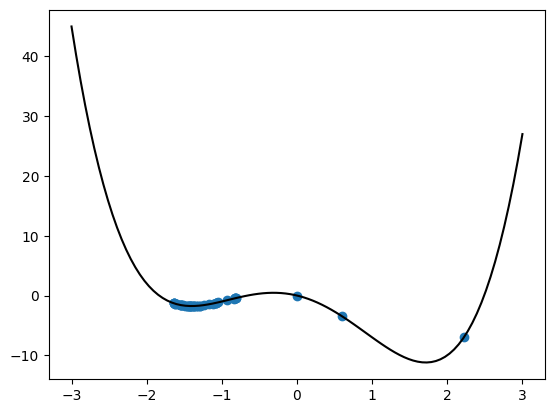

In [55]:
#gradient descent of the function
vector, vector_lst = simple_gd(gradient=lambda v:4*v**3-10*v-3, start=0, learn_rate=0.2)
vector_lst_y = [i**4-5*i**2-3*i for i in vector_lst]
#plot function
x = np.linspace(-3, 3, 100)
y = [i**4-5*i**2-3*i for i in x]
plt.plot(x, y, color="black")
plt.scatter(vector_lst, vector_lst_y)

Smaller step solves the problem

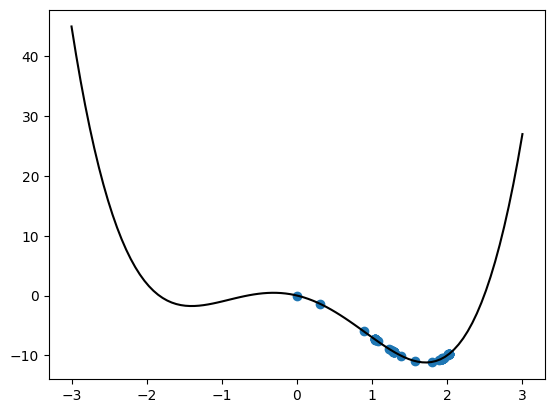

In [56]:
#gradient descent of the function
vector, vector_lst = simple_gd(gradient=lambda v:4*v**3-10*v-3, start=0, learn_rate=0.1)
vector_lst_y = [i**4-5*i**2-3*i for i in vector_lst]
#plot function
x = np.linspace(-3, 3, 100)
y = [i**4-5*i**2-3*i for i in x]
plt.plot(x, y, color="black")
plt.scatter(vector_lst, vector_lst_y)

# Stochastic Gradient Descent

- Calculate the gradient with just a random small part of the observation instead of all of them. This reduces computation time in some cases.
- **Online SGD:** estimate the gradient for each observation and update the decision variables accordingly. This helps finding the global minimum, especially if the function is convex.
- **Batch SGD:** gradients are calculated and decision variables are updated iteratiely with subsets of all observations, called **minibatches**. This variant is popular in training neural nets.

- SGD randomly divides the set of observations into minibatches
- For each minibatech, the gradient is computed and the vector is moved
- One all minibatches are used, the epoch (iteration) is finished and start the next one

https://www.youtube.com/watch?v=vMh0zPT0tLI&ab_channel=StatQuestwithJoshStarmer

In [88]:
def sgd(gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50, tolerance=1e-06, dtype="float64", random_state=None):
    """
        batch_size: number of observations in each minibatch; can significantly influence performance
        random_state: random seed; if None is passed, then it return different number each time
    """
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")
    dtype_ = np.dtype(dtype)
    
    #convert x and y to np arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    
    #reshape converts both x and y into two-dim arrays with n_obs rows and y has exactly one column
    #np.c_[] concatenates columns of x and y into a single array
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]
    
    #random generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)
    
    #variable setup
    vector = np.array(start, dtype=dtype_)
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")
    
    #minibatches setup
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError("'batch_size' must be greater than zero and less than or equal to the number of observations")

    #max iterations setup
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")
    
    #tolerance setup
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")        
    
    #gradient descent
    for i in range(n_iter):
        #shuffle x and y to choose minibatches randomly
        rng.shuffle(xy)
        
        #repeated by every batch
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            #recalculate difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad
            
            #check tolerance
            if np.all(np.abs(diff) <= tolerance):
                break
            
            #update values
            vector += diff

    return vector if vector.shape else vector.item()

In [89]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    #mean of res is partial C over partial b0
    #mean of (res*x) is partial C over partial b1
    return res.mean(), (res * x).mean()

In [91]:
sgd(
    ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008,
    batch_size=3, n_iter=100_000, random_state=0
)

array([ 1.57357164, -2.9406124 ])

# Packages in Python

In [3]:
import tensorflow as tf

In [9]:
#sgd: an instance of sgd optimizer with learning rate 0.1 and momentum 0.9
sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.1, momentum=0.9)
#var: instance of the decision vairable with an init value 2.5
var = tf.Variable(2.5)
#cost: cost function
cost = lambda: 2 + var ** 2

# Perform optimization
for _ in range(100):
    sgd.minimize(cost, var_list=[var])

# Extract results
print(var.numpy())
print(cost().numpy())

-0.007128528
2.0000508
